# 1.6 삼전 누적 수익률 및 MDD

In [5]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
samsung = fdr.DataReader("005930")
print(samsung.head())

            Open  High  Low  Close  Volume    Change
Date                                                
1998-06-29   781   791  765    765  330510       NaN
1998-06-30   765   809  755    791  373730  0.033987
1998-07-01   804   886  796    886  719666  0.120101
1998-07-02   888   921  856    869  869104 -0.019187
1998-07-03   869   884  839    849  398758 -0.023015


In [7]:
# change는 첫날 하루만 NaN 값으로 설정되어 있음
print(pd.isnull(samsung).sum())

Open      0
High      0
Low       0
Close     0
Volume    0
Change    1
dtype: int64


# 삼전 단일 종목 투자성

In [8]:
# 삼성전자 단일 종목 수익률
samsungDayReturn = (samsung['Close'] / samsung['Close'].shift(1)).fillna(1)
samsungDayReturn

Date
1998-06-29    1.000000
1998-06-30    1.033987
1998-07-01    1.120101
1998-07-02    0.980813
1998-07-03    0.976985
                ...   
2022-09-05    0.993043
2022-09-06    1.000000
2022-09-07    0.980736
2022-09-08    0.992857
2022-09-13    1.048561
Name: Close, Length: 6000, dtype: float64

In [9]:
# 삼전 누적수익률
samsungCumulativeReturn = samsungDayReturn.cumprod() #cumprod : 누적 곱
samsungCumulativeReturn

Date
1998-06-29     1.000000
1998-06-30     1.033987
1998-07-01     1.158170
1998-07-02     1.135948
1998-07-03     1.109804
                ...    
2022-09-05    74.640523
2022-09-06    74.640523
2022-09-07    73.202614
2022-09-08    72.679739
2022-09-13    76.209150
Name: Close, Length: 6000, dtype: float64

In [10]:
# cagr
samsungCagr = samsungCumulativeReturn.iloc[-1] ** (252/len(samsung))
# mdd
samsungDd = (samsungCumulativeReturn.cummax() - samsungCumulativeReturn) / samsungCumulativeReturn
samsungMdd = samsungDd.max()
print("cagr: ",samsungCagr)
print("mdd: ",samsungMdd)


cagr:  1.1996216610426207
mdd:  1.842490842490845


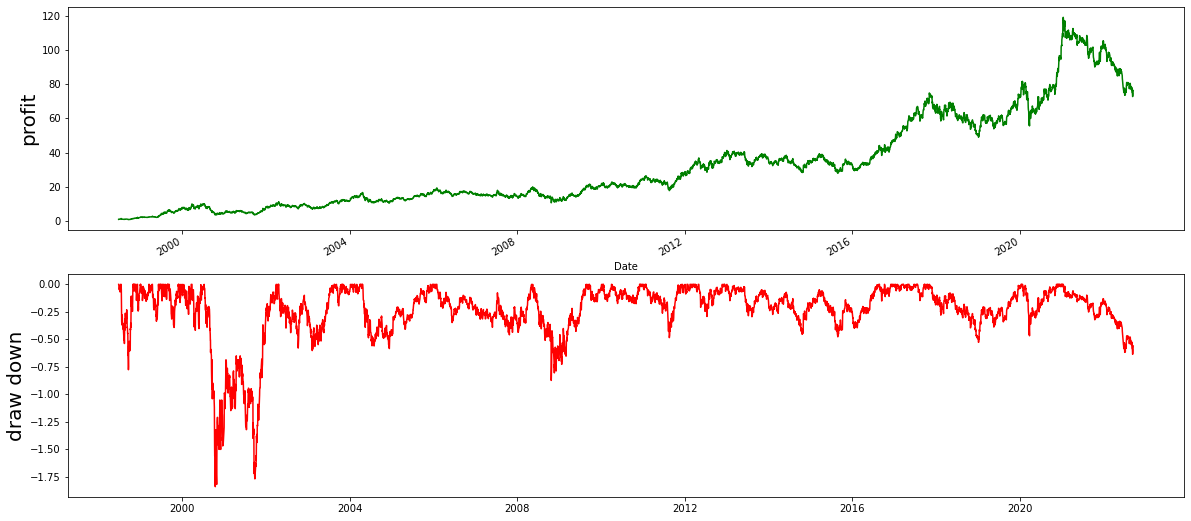

In [11]:
# 시각화
plt.figure(figsize=(20, 10))
# 수익곡선
plt.subplot(2, 1, 1)
samsungCumulativeReturn.plot(color="green")
plt.ylabel("profit", fontsize=20)
# 낙폭곡선
plt.subplot(2, 1, 2)
plt.plot(-samsungDd, color="red")
plt.ylabel("draw down", fontsize=20)
plt.show()